In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
%matplotlib inline

from keras.models import Sequential
from keras.layers import Dense , Dropout , Lambda, Flatten
from keras.optimizers import Adam ,RMSprop
from sklearn.model_selection import train_test_split
from keras import  backend as K
from keras.preprocessing.image import ImageDataGenerator

In [2]:
# create the training & test sets, skipping the header row with [1:]
train = pd.read_csv("_train.csv")
print(train.shape)
train.head()

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
test= pd.read_csv("_test.csv")
print(test.shape)
test.head()

(28000, 784)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
X_train = (train.iloc[:,1:].values).astype('float32') # all pixel values
y_train = train.iloc[:,0].values.astype('int32') # only labels i.e targets digits
X_test = test.values.astype('float32')

In [5]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [6]:
y_train

array([1, 0, 1, ..., 7, 6, 9])

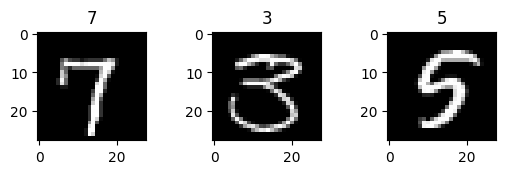

In [7]:
#Convert train datset to (num_images, img_rows, img_cols) format 
X_train = X_train.reshape(X_train.shape[0], 28, 28)

for i in range(6, 9):
    plt.subplot(330 + (i+1))
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
    plt.title(y_train[i]);

In [8]:
#expand 1 more dimention as 1 for colour channel gray
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_train.shape

(42000, 28, 28, 1)

In [9]:
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)
X_test.shape

(28000, 28, 28, 1)

In [10]:
mean_px = X_train.mean().astype(np.float32)
std_px = X_train.std().astype(np.float32)

def standardize(x): 
    return (x-mean_px)/std_px

In [11]:
#from keras.utils.np_utils import to_categorical
from keras.utils import to_categorical
y_train= to_categorical(y_train)
num_classes = y_train.shape[1]
num_classes

10

C:\Python311\Lib\site-packages\matplotlib\text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


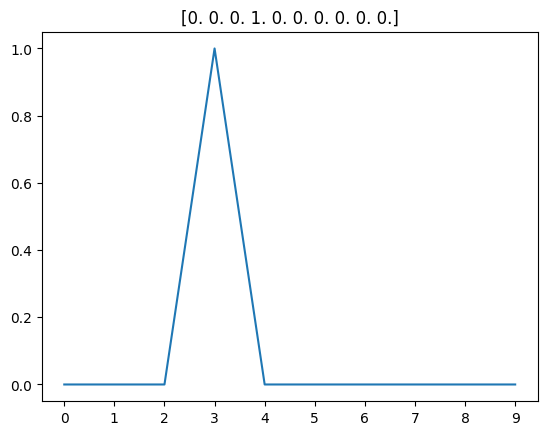

In [12]:
plt.title(y_train[9])
plt.plot(y_train[9])
plt.xticks(range(10));

## Design NN arch

In [13]:
# fix random seed for reproducibility
seed = 43
np.random.seed(seed)

In [14]:
from keras.models import  Sequential
#import keras.layers
from keras.layers import  Lambda , Dense, Flatten, Dropout
from keras.callbacks import EarlyStopping
from keras.layers import BatchNormalization, Convolution2D , MaxPooling2D

In [15]:
model= Sequential()
model.add(Lambda(standardize,input_shape=(28,28,1)))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
print("input shape ",model.input_shape)
print("output shape ",model.output_shape)

input shape  (None, 28, 28, 1)
output shape  (None, 10)


In [16]:
from keras.optimizers import RMSprop
model.compile(optimizer=RMSprop(lr=0.001),
 loss='categorical_crossentropy',
 metrics=['accuracy'])

In [17]:
from keras.preprocessing import image
gen = image.ImageDataGenerator()

In [18]:
from sklearn.model_selection import train_test_split
X = X_train
y = y_train
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.80, random_state=42)
batches = gen.flow(X_train, y_train, batch_size=64)
val_batches=gen.flow(X_val, y_val, batch_size=64)

In [19]:
history=model.fit_generator(generator=batches, steps_per_epoch=len(X_train)//64, epochs=5, 
                    validation_data=val_batches, validation_steps=val_batches.n)

Epoch 1/5


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18960\2064453450.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=model.fit_generator(generator=batches, steps_per_epoch=len(X_train)//64, epochs=5,


126/131 [===========================>..] - ETA: 0s - loss: 0.8217 - accuracy: 0.7483WARNING:tensorflow:Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches (in this case, 33600 batches). You may need to use the repeat() function when building your dataset.


131/131 [==============================] - 5s 33ms/step - loss: 0.8074 - accuracy: 0.7531 - val_loss: 0.4362 - val_accuracy: 0.8676
Epoch 2/5
131/131 [==============================] - 1s 5ms/step - loss: 0.3889 - accuracy: 0.8875
Epoch 3/5
131/131 [==============================] - 1s 4ms/step - loss: 0.3311 - accuracy: 0.9058
Epoch 4/5
131/131 [==============================] - 1s 4ms/step - loss: 0.3000 - accuracy: 0.9145
Epoch 5/5
131/131 [==============================] - 1s 5ms/step - loss: 0.2843 - accuracy: 0.9200


In [20]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

ValueError: x and y must have same first dimension, but have shapes (5,) and (1,)

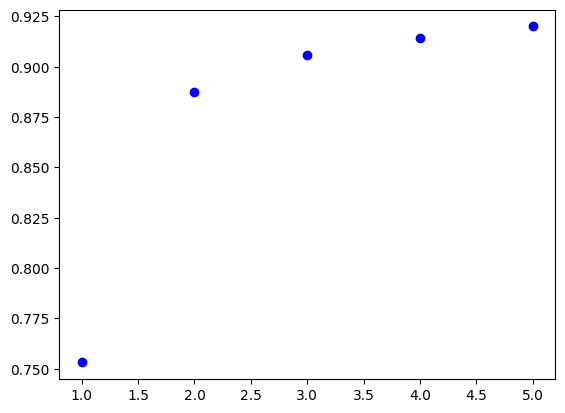

In [36]:
#neural network result
plt.clf()   # clear figure
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(acc) + 1)

epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

ValueError: x and y must have same first dimension, but have shapes (5,) and (1,)

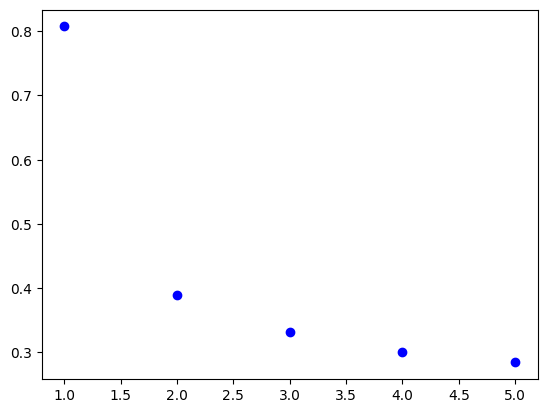

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss_values, 'bo')
# b+ is for "blue crosses"
plt.plot(epochs, val_loss_values, 'b+')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.show()

In [48]:
def get_fc_model():
    model = Sequential([
        Lambda(standardize, input_shape=(28,28,1)),
        Flatten(),
        Dense(512, activation='relu'),
        Dense(10, activation='softmax')
        ])
    model.compile(optimizer='Adam', loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [49]:
fc = get_fc_model()
fc.optimizer.lr=0.01

In [52]:
history=fc.fit_generator(generator=batches, steps_per_epoch=len(X_train)//64, epochs=5, 
                    validation_data=val_batches, validation_steps=val_batches.n)

Epoch 1/5
  8/131 [>.............................] - ETA: 0s - loss: 0.2103 - accuracy: 0.9238

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18508\3953920665.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=fc.fit_generator(generator=batches, steps_per_epoch=len(X_train)//64, epochs=5,


125/131 [===========================>..] - ETA: 0s - loss: 0.1654 - accuracy: 0.9477WARNING:tensorflow:Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches (in this case, 33600 batches). You may need to use the repeat() function when building your dataset.


131/131 [==============================] - 3s 24ms/step - loss: 0.1640 - accuracy: 0.9481 - val_loss: 0.2518 - val_accuracy: 0.9333
Epoch 2/5
131/131 [==============================] - 1s 7ms/step - loss: 0.1489 - accuracy: 0.9543
Epoch 3/5
131/131 [==============================] - 1s 7ms/step - loss: 0.1280 - accuracy: 0.9617
Epoch 4/5
131/131 [==============================] - 1s 7ms/step - loss: 0.1379 - accuracy: 0.9622
Epoch 5/5
131/131 [==============================] - 1s 7ms/step - loss: 0.1364 - accuracy: 0.9617


In [53]:
from keras.layers import Convolution2D, MaxPooling2D

def get_cnn_model():
    model = Sequential([
        Lambda(standardize, input_shape=(28,28,1)),
        Convolution2D(32,(3,3), activation='relu'),
        Convolution2D(32,(3,3), activation='relu'),
        MaxPooling2D(),
        Convolution2D(64,(3,3), activation='relu'),
        Convolution2D(64,(3,3), activation='relu'),
        MaxPooling2D(),
        Flatten(),
        Dense(512, activation='relu'),
        Dense(10, activation='softmax')
        ])
    model.compile(Adam(), loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [54]:
model= get_cnn_model()
model.optimizer.lr=0.01

In [58]:
history=model.fit_generator(generator=batches, steps_per_epoch=len(X_train)//64, epochs=5, 
                    validation_data=val_batches, validation_steps=val_batches.n)

Epoch 1/5


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18508\2064453450.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=model.fit_generator(generator=batches, steps_per_epoch=len(X_train)//64, epochs=5,


131/131 [==============================] - ETA: 0s - loss: 0.2835 - accuracy: 0.9106WARNING:tensorflow:Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches (in this case, 33600 batches). You may need to use the repeat() function when building your dataset.


131/131 [==============================] - 22s 170ms/step - loss: 0.2835 - accuracy: 0.9106 - val_loss: 0.2273 - val_accuracy: 0.9316
Epoch 2/5
131/131 [==============================] - 9s 67ms/step - loss: 0.1924 - accuracy: 0.9409
Epoch 3/5
131/131 [==============================] - 9s 67ms/step - loss: 0.1583 - accuracy: 0.9518
Epoch 4/5
131/131 [==============================] - 9s 69ms/step - loss: 0.1580 - accuracy: 0.9533
Epoch 5/5
131/131 [==============================] - 9s 66ms/step - loss: 0.1346 - accuracy: 0.9611


In [59]:
gen =ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3,
                               height_shift_range=0.08, zoom_range=0.08)
batches = gen.flow(X_train, y_train, batch_size=64)
val_batches = gen.flow(X_val, y_val, batch_size=64)

In [61]:
model.optimizer.lr=0.001
history=model.fit_generator(generator=batches, steps_per_epoch=len(X_train)//64, epochs=5, 
                    validation_data=val_batches, validation_steps=val_batches.n)

Epoch 1/5


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18508\3712253601.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=model.fit_generator(generator=batches, steps_per_epoch=len(X_train)//64, epochs=5,


131/131 [==============================] - ETA: 0s - loss: 0.0629 - accuracy: 0.9818WARNING:tensorflow:Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches (in this case, 33600 batches). You may need to use the repeat() function when building your dataset.


131/131 [==============================] - 21s 162ms/step - loss: 0.0629 - accuracy: 0.9818 - val_loss: 0.0894 - val_accuracy: 0.9731
Epoch 2/5
131/131 [==============================] - 9s 66ms/step - loss: 0.0587 - accuracy: 0.9827
Epoch 3/5
131/131 [==============================] - 9s 68ms/step - loss: 0.0540 - accuracy: 0.9833
Epoch 4/5
131/131 [==============================] - 9s 71ms/step - loss: 0.0476 - accuracy: 0.9858
Epoch 5/5
131/131 [==============================] - 9s 68ms/step - loss: 0.0449 - accuracy: 0.9860


In [63]:
from keras.layers import BatchNormalization

def get_bn_model():
    model = Sequential([
        Lambda(standardize, input_shape=(28,28,1)),
        Convolution2D(32,(3,3), activation='relu'),
        BatchNormalization(axis=1),
        Convolution2D(32,(3,3), activation='relu'),
        MaxPooling2D(),
        BatchNormalization(axis=1),
        Convolution2D(64,(3,3), activation='relu'),
        BatchNormalization(axis=1),
        Convolution2D(64,(3,3), activation='relu'),
        MaxPooling2D(),
        Flatten(),
        BatchNormalization(),
        Dense(512, activation='relu'),
        BatchNormalization(),
        Dense(10, activation='softmax')
        ])
    model.compile(Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [65]:
model= get_bn_model()
model.optimizer.lr=0.01
history=model.fit_generator(generator=batches, steps_per_epoch=len(X_train)//64, epochs=5, 
                    validation_data=val_batches, validation_steps=val_batches.n)

Epoch 1/5


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18508\886180901.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=model.fit_generator(generator=batches, steps_per_epoch=len(X_train)//64, epochs=5,


131/131 [==============================] - ETA: 0s - loss: 0.4615 - accuracy: 0.8784WARNING:tensorflow:Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches (in this case, 33600 batches). You may need to use the repeat() function when building your dataset.


131/131 [==============================] - 33s 226ms/step - loss: 0.4615 - accuracy: 0.8784 - val_loss: 1.0988 - val_accuracy: 0.7899
Epoch 2/5
131/131 [==============================] - 14s 105ms/step - loss: 0.1818 - accuracy: 0.9466
Epoch 3/5
131/131 [==============================] - 14s 109ms/step - loss: 0.1373 - accuracy: 0.9572
Epoch 4/5
131/131 [==============================] - 14s 104ms/step - loss: 0.1201 - accuracy: 0.9651
Epoch 5/5
131/131 [==============================] - 13s 102ms/step - loss: 0.1149 - accuracy: 0.9663


In [67]:
model.optimizer.lr=0.01
gen = image.ImageDataGenerator()
batches = gen.flow(X, y, batch_size=64)
history=model.fit_generator(generator=batches, steps_per_epoch=len(X_train)//64, epochs=5)

Epoch 1/5


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18508\2064705159.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=model.fit_generator(generator=batches, steps_per_epoch=len(X_train)//64, epochs=5)


131/131 [==============================] - 14s 103ms/step - loss: 0.0352 - accuracy: 0.9894
Epoch 2/5
131/131 [==============================] - 13s 98ms/step - loss: 0.0389 - accuracy: 0.9888
Epoch 3/5
131/131 [==============================] - 13s 99ms/step - loss: 0.0333 - accuracy: 0.9902
Epoch 4/5
131/131 [==============================] - 13s 99ms/step - loss: 0.0416 - accuracy: 0.9874
Epoch 5/5
131/131 [==============================] - 13s 98ms/step - loss: 0.0389 - accuracy: 0.9882


In [83]:
predictions = model.predict(X_test)

875/875 [==============================] - 10s 12ms/step


In [91]:
# for i in range(len(X_test)):
#     pred = model.predict(X_test[i].reshape(1, 28, 28, 1))
#     pred.append(np.argmax(pred))
#     print(len(predictions))

print(len(predictions))

28000


In [86]:
predictions = pd.DataFrame(predictions)
predictions

,0,1,2,3,4,5,6,7,8,9
0,1.942147e-10,3.746314e-11,1.000000e+00,5.938297e-10,4.493258e-09,2.050184e-12,6.148464e-11,5.527740e-09,1.139720e-08,1.877248e-10
1,9.999948e-01,3.344230e-10,1.095546e-06,1.777626e-09,4.063345e-08,2.225131e-07,3.716547e-06,1.105088e-07,1.580448e-09,1.292585e-07
2,2.389581e-08,1.075952e-07,2.872669e-07,2.233606e-06,2.820513e-05,2.049239e-07,5.597695e-11,1.265140e-07,4.909412e-05,9.999197e-01
3,2.285305e-02,1.501718e-08,5.660988e-07,2.629225e-06,3.957816e-06,8.754982e-07,1.075757e-06,4.957078e-07,6.695292e-06,9.771307e-01
4,1.561798e-09,5.615323e-08,3.321651e-05,9.998925e-01,1.830427e-10,5.356096e-11,2.541796e-10,1.024932e-09,7.429846e-05,1.886278e-10
...,...,...,...,...,...,...,...,...,...,...
27995,2.941530e-11,1.019674e-13,3.876424e-12,1.923824e-09,1.323053e-07,1.418448e-08,1.052435e-13,4.074887e-10,2.561393e-08,9.999999e-01
27996,6.786355e-06,4.657819e-06,4.632588e-05,5.427549e-05,9.759963e-06,2.610490e-07,3.243052e-09,9.998417e-01,6.185007e-08,3.622108e-05
27997,9.314409e-17,1.705710e-11,9.832363e-14,1.000000e+00,9.638170e-16,8.449882e-13,2.080429e-16,1.018543e-12,6.276333e-12,8.695089e-14
27998,2.006239e-07,1.721717e-07,4.071444e-09,7.295288e-07,1.031862e-03,4.239805e-07,1.148013e-10,1.143477e-05,8.424213e-06,9.989467e-01


In [98]:
result = np.argmax(predictions, axis=1)

In [102]:
result  = pd.DataFrame(result)
result.head()

,0
0,2
1,0
2,9
3,9
4,3


In [104]:
df_test = pd.read_csv('sample_submission.csv')
df_test = pd.concat([df_test, result],axis=1)
df_test = df_test.drop(columns=['Label'])
df_test = df_test.rename(columns = {0:'Label'})
df_test = df_test[['ImageId', 'Label']]
df_test

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


In [105]:
df_test.to_csv('submission.csv', index=False)